In [10]:
from fastkaggle import *
import pandas as pd

from fastai.text.all import *

In [11]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [2]:
path = setup_comp('nlp-getting-started')

In [3]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
dls = TextDataLoaders.from_df(train_df, text_col='text', label_col='target', valid_pct=0.2, bs=64)

In [6]:
dls.show_batch()

,text,category
0,xxbos _ \n▁ xxrep 5 ? xxup retweet \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup follow xxup all xxup who xxup rt \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup xxunk \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup gain xxup with \n▁ xxrep 7 ? \n▁ xxrep 5 ? xxup follow ? xxunk # xxup xxunk \n▁ # xxup ty,0
1,xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n\n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
2,xxbos xxup info xxup r. xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup wnd : xxunk / 5 . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup xxunk . xxup tmp : 10 . xxup xxunk : xxunk .,0
3,xxbos xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .,0
4,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,0
5,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,1
6,xxbos xxmaj no # news of # hostages in # xxmaj libya \n\n http : / / t.co / xxunk \n\n▁ # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
7,xxbos xxmaj no # news of # hostages in # xxmaj libya \n\n http : / / t.co / xxunk \n\n▁ # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
8,xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxup xxunk xxmaj please # xxup rt,0


In [19]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

SuggestedLRs(valley=0.0012022644514217973)

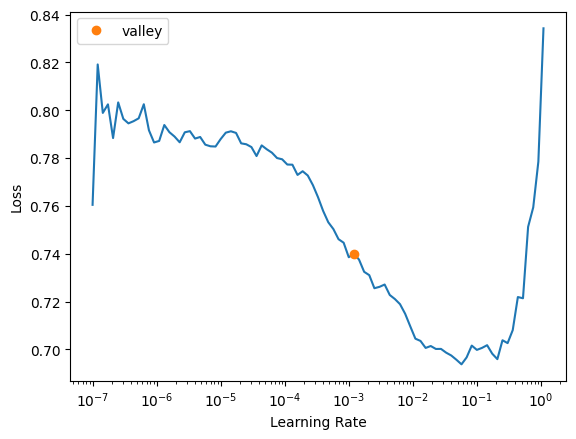

In [20]:
learn.lr_find()

In [21]:
learn.fine_tune(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.561960,0.509453,0.754928,00:14
1,0.523040,0.479617,0.777924,00:14
2,0.511143,0.473708,0.791064,00:13
3,0.487953,0.470847,0.788436,00:13


In [22]:
learn.show_results()

,text,category,category_
0,xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0,0
1,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,1,0
2,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,1,0
3,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,1,0
4,xxbos xxmaj learn xxmaj how i xxmaj gained xxmaj access xxmaj to xxmaj the xxmaj secrets xxmaj of xxmaj the xxmaj top xxmaj earners & & xxmaj used xxmaj them xxmaj to xxmaj explode xxmaj my xxmaj home xxmaj business xxmaj here : http : / / t.co / xxunk xxmaj please # xxup rt,0,0
5,xxbos ? xxunk xxmaj day xxmaj since 17 - xxunk -- xxmaj nigeria : xxmaj suicide xxmaj bomb xxmaj attacks xxmaj killed 64 xxmaj people ; xxmaj blamed : xxmaj boko xxmaj haram [ l.a . xxmaj times / xxup ap ] | http : / / t.co / xxunk,1,1
6,xxbos # nowplaying * xxmaj cliff xxmaj richard - i xxmaj could xxmaj easily xxmaj fall ( in xxmaj love xxmaj with xxmaj you ) ( & & xxmaj xxunk ) * # xxmaj internet # xxmaj xxunk # xxmaj radio xxmaj on http : / / t.co / xxunk,0,0
7,xxbos * new * xxmaj snap xxmaj on xxmaj tools xxmaj black baseball xxmaj hat / xxmaj cap xxmaj silver / xxmaj gray xxmaj embroidered s xxmaj logo xxmaj flames - xxmaj full reû _ http : / / t.co / xxunk http : / / t.co / xxunk,0,0
8,xxbos xxmaj we 're # hiring ! xxmaj click to apply : xxup rn xxup ii / xxup emergency xxup services / xxup ft / xxunk - http : / / t.co / xxunk # xxmaj nursing # xxmaj houston xxup xxunk http : / / t.co / xxunk,1,0


In [23]:
test_dl = dls.test_dl(pd.read_csv(path/'test.csv')['text'])

In [24]:
test_dl.show_batch()

,text
0,xxbos xxup oh xxup my xxup xxunk xxup i m xxup at xxup my xxup xxunk xxup house xxup and xxup this xxup post xxup it xxup was xxup on xxup her xxup counter xxup and i xxup screamed xxup bc i xxup thought xxup it xxup said xxup chris xxup xxunk http : / / t.co / xxunk
1,xxbos xxmaj we d xxmaj aug 8 ! # xxmaj mayhem @ xxmaj xxunk ! 19 + xxmaj event ! xxmaj july & & xxmaj aug xxmaj xxunk xxmaj free ! xxmaj xxunk - > http : / / t.co / xxunk xxmaj xxunk ( xxunk ) xxunk - xxunk http : / / t.co / xxunk
2,xxbos ' # xxup otrametlife ' i xxup swear xxup to xxup god i xxup did nt xxup even xxup read xxup it xxup xxunk xxup and i xxup though xxup it xxup said ' xxunk xxup life ' xxup and xxup screamed . i xxup need xxup to xxup sleep xxup omfg . xxup xxunk .
3,xxbos xxmaj truth … \n https : / / t.co / xxunk xxunk # xxmaj news xxunk # xxup bbc xxunk # xxup cnn xxunk # xxmaj islam xxunk # xxmaj truth xxunk # god xxunk # xxup isis xxunk # terrorism xxunk # xxmaj quran xxunk # xxmaj lies http : / / t.co / xxunk
4,xxbos xxmaj truth … \n https : / / t.co / xxunk xxunk # xxmaj news xxunk # xxup bbc xxunk # xxup cnn xxunk # xxmaj islam xxunk # xxmaj truth xxunk # god xxunk # xxup isis xxunk # terrorism xxunk # xxmaj quran xxunk # xxmaj lies http : / / t.co / xxunk
5,xxbos xxmaj truth … \n https : / / t.co / xxunk xxunk # xxmaj news xxunk # xxup bbc xxunk # xxup cnn xxunk # xxmaj islam xxunk # xxmaj truth xxunk # god xxunk # xxup isis xxunk # terrorism xxunk # xxmaj quran xxunk # xxmaj lies http : / / t.co / xxunk
6,xxbos xxup xxunk i xxup swear xxup to xxup god xxup if xxup xxunk xxup one xxup more xxup god xxup damn xxup piece xxup of xxup xxunk xxup in xxup the xxup xxunk i xxup am xxup going xxup to xxup destroy xxup all xxup those xxup little xxup fish . xxunk # xxunk
7,xxbos xxmaj school xxmaj xxunk xxmaj start : \n\n xxmaj back xxmaj to xxmaj these xxmaj xxunk xxmaj ass xxmaj kids \n\n xxmaj loud xxmaj ugly xxmaj want xxmaj be xxmaj seen xxmaj girls \n\n xxmaj niggas xxmaj that xxmaj want xxmaj be xxmaj down \n\n xxmaj xxunk xxmaj ass xxmaj teachers \n ? ?
8,xxbos xxmaj name : xxmaj xxunk \n xxmaj xxunk : xxmaj xxunk \n xxmaj age : 10 \n xxmaj hair : xxmaj red \n xxmaj eyes : xxmaj xxunk \n xxmaj xxunk xxmaj type : xxmaj xxunk \n xxmaj blood xxmaj type : xxmaj type o \n http : / / t.co / xxunk


In [27]:
preds, _ = learn.get_preds(dl=test_dl)

In [28]:
preds

tensor([[0.2712, 0.7288],
        [0.2959, 0.7041],
        [0.1411, 0.8589],
        ...,
        [0.0678, 0.9322],
        [0.1551, 0.8449],
        [0.4636, 0.5364]])

In [29]:
results = torch.where(preds[:, 1] > 0.5, 1, 0)
results

tensor([1, 1, 1,  ..., 1, 1, 1])

In [35]:
results.numpy()

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
series = pd.Series(results.numpy(), name='target')

In [37]:
series.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [38]:
series.to_csv('submission.csv', index_label='id', header=True)